# Data Preprocessing

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## Load Dataset

In [2]:
#load dataset from local
df = pd.read_csv('hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


## Descriptive Statistics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Handle Missing Values

In [4]:
#check null values
df.isnull().sum().sort_values(ascending = False) 

company                           112593
agent                              16340
city                                 488
children                               4
hotel                                  0
is_repeated_guest                      0
total_of_special_requests              0
required_car_parking_spaces            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
previous_bookings_not_canceled         0
previous_cancellations                 0
market_segment                         0
distribution_channel                   0
is_canceled                            0
meal                                   0
babies                                 0
adults                                 0
stays_in_weekdays_nights               0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
arrival_date_wee

In [5]:
df.isnull().sum().sort_values(ascending = False)/len(df)*100

company                           94.306893
agent                             13.686238
city                               0.408744
children                           0.003350
hotel                              0.000000
is_repeated_guest                  0.000000
total_of_special_requests          0.000000
required_car_parking_spaces        0.000000
adr                                0.000000
customer_type                      0.000000
days_in_waiting_list               0.000000
deposit_type                       0.000000
booking_changes                    0.000000
previous_bookings_not_canceled     0.000000
previous_cancellations             0.000000
market_segment                     0.000000
distribution_channel               0.000000
is_canceled                        0.000000
meal                               0.000000
babies                             0.000000
adults                             0.000000
stays_in_weekdays_nights           0.000000
stays_in_weekend_nights         

There are null values in `children`, `city`, `agent`, `company` columns.

In [6]:
null_numericals = ['children', 'agent', 'company']
df[null_numericals].describe()

,children,agent,company
count,119386.000000,103050.000000,6797.000000
mean,0.103890,86.693382,189.266735
std,0.398561,110.774548,131.655015
min,0.000000,1.000000,6.000000
25%,0.000000,9.000000,62.000000
50%,0.000000,14.000000,179.000000
75%,0.000000,229.000000,270.000000
max,10.000000,535.000000,543.000000


In [7]:
null_categoricals = ['city']
df[null_categoricals].describe()

,city
count,118902
unique,177
top,Kota Denpasar
freq,48590


In [8]:
#impute missing values with 0 for numericals and Unknown for categoricals
df['children'].fillna(0, inplace = True)
df['agent'].fillna(0, inplace = True) 
df['company'].fillna(0, inplace = True)
df['city'].fillna('Unknown', inplace = True)

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

## Handle Odd Values

In [9]:
df.meal.unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [10]:
df['meal'].replace('Undefined', 'No Meal', inplace = True) #replace undefined to no meal

In [11]:
df.meal.unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal'], dtype=object)

## Handle Unnecessary Values

In [12]:
df['guest'] = df['adults']+df['children']+df['babies']
df.groupby('reservation_status').agg({'guest': 'count'})

,guest
reservation_status,
Canceled,43017
Check-Out,75166
No-Show,1207


In [13]:
print(df[df['guest']==0].shape[0])
data = df[df['guest']>0].copy() #using data variabel for next analysis

180


# Monthly Hotel Booking Analysis Based on Hotel Type

In [14]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'meal',
       'city', 'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'guest'],
      dtype='object')

## Hotel Bookings by Month

In [15]:
# make aggregat table with total bookings per month by hotel type
hotel_per_month = data.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique', 'count']).reset_index()
hotel_per_month

,hotel,arrival_date_month,nunique,count
0,City Hotel,April,2,4950
1,City Hotel,August,2,7885
2,City Hotel,December,2,7594
3,City Hotel,February,2,4114
4,City Hotel,January,2,4336
5,City Hotel,July,2,8221
6,City Hotel,June,2,7469
7,City Hotel,March,2,3730
8,City Hotel,May,2,6434
9,City Hotel,November,2,7392


## Data Normalize

In [16]:
# make average by divide count per nunique 
hotel_per_month['average'] = round(hotel_per_month['count']/hotel_per_month['nunique'])
hotel_per_month

,hotel,arrival_date_month,nunique,count,average
0,City Hotel,April,2,4950,2475.0
1,City Hotel,August,2,7885,3942.0
2,City Hotel,December,2,7594,3797.0
3,City Hotel,February,2,4114,2057.0
4,City Hotel,January,2,4336,2168.0
5,City Hotel,July,2,8221,4110.0
6,City Hotel,June,2,7469,3734.0
7,City Hotel,March,2,3730,1865.0
8,City Hotel,May,2,6434,3217.0
9,City Hotel,November,2,7392,3696.0


## Data Sort by Month

In [17]:
hotel_per_month['month'] = hotel_per_month['arrival_date_month'].str[:3] #get 3 first words of month
hotel_per_month['month'] = pd.Categorical(hotel_per_month['month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) #sort by categories
hotel_per_month.sort_values('month')

,hotel,arrival_date_month,nunique,count,average,month
4,City Hotel,January,2,4336,2168.0,Jan
16,Resort Hotel,January,2,2435,1218.0,Jan
3,City Hotel,February,2,4114,2057.0,Feb
15,Resort Hotel,February,2,2645,1322.0,Feb
7,City Hotel,March,2,3730,1865.0,Mar
19,Resort Hotel,March,2,2191,1096.0,Mar
0,City Hotel,April,2,4950,2475.0,Apr
12,Resort Hotel,April,2,3102,1551.0,Apr
20,Resort Hotel,May,2,3334,1667.0,May
8,City Hotel,May,2,6434,3217.0,May


In [18]:
data.arrival_date_year.unique()

array([2017, 2018, 2019], dtype=int64)

## Visualization

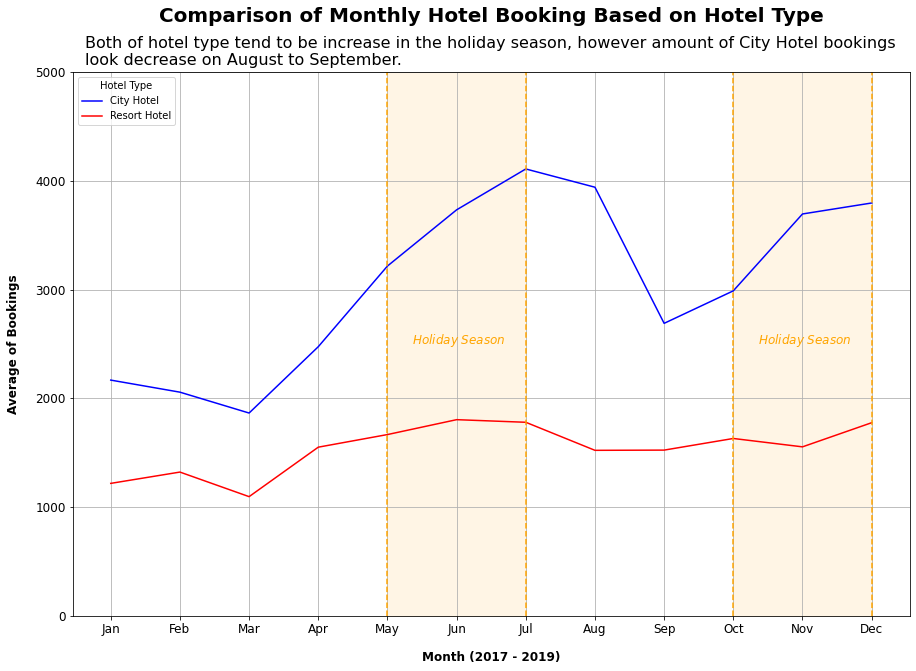

In [19]:
plt.figure(figsize=(15,10))
sns.lineplot(x='month', y='average', hue='hotel', data=hotel_per_month, palette=['blue', 'red'])

#set title, caption and legend
plt.grid()
plt.title('Comparison of Monthly Hotel Booking Based on Hotel Type', fontsize=20, fontweight='bold', pad=50)
plt.text(x=-0.37,y=5065, s='Both of hotel type tend to be increase in the holiday season, however amount of City Hotel bookings \nlook decrease on August to September.', fontsize=16)
plt.legend(title='Hotel Type')

#set label
plt.xlabel('Month (2017 - 2019)', fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Average of Bookings', fontsize=12, fontweight='bold', labelpad=15)
plt.ylim(0,5000)
plt.tick_params(axis='both', which='major', labelsize=12)


#set holiday season
plt.axvline(x=4, color='orange', ls='--')
plt.axvline(x=6, color='orange', ls='--')
plt.stackplot([4, 5, 6], [5000], color='orange', alpha=0.1)
plt.text(x=4.35, y=2500, s='$\it{Holiday}$ $\it{Season}$', fontsize=12, color='orange')

#set holiday season
plt.axvline(x=9, color='orange', ls='--')
plt.axvline(x=11, color='orange', ls='--')
plt.stackplot([9, 10, 11], [5000], color='orange', alpha=0.1)
plt.text(x=9.35, y=2500, s='$\it{Holiday}$ $\it{Season}$', fontsize=12, color='orange');

#save to image
plt.savefig('Monthly Hotel Booking Based on Hotel Type.png')

# Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

## Stays Duration

In [20]:
#create new column as stay duration
data['stays_duration'] = data['stays_in_weekend_nights'] + data['stays_in_weekdays_nights']
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest,stays_duration
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0,2


## Grouping Stays Duration

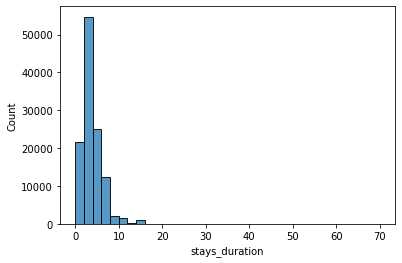

In [27]:
sns.histplot(data['stays_duration'], binwidth=2);

In [22]:
data['stays_duration_group'] = np.where(data['stays_duration']>=20,20,np.where(data['stays_duration']>=15,15,data['stays_duration']))
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest,stays_duration,stays_duration_group
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,0.0,0,Personal,0.0,0,0,Check-Out,2.0,0,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,0.0,0,Personal,0.0,0,0,Check-Out,2.0,0,0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0.0,0,Personal,75.0,0,0,Check-Out,1.0,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0.0,0,Personal,75.0,0,0,Check-Out,1.0,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0.0,0,Personal,98.0,0,1,Check-Out,2.0,2,2


## Comparison Cancellation of Hotel Bookings Toward Duration on Hotel Type 

In [23]:
data.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [24]:
#create aggregate table
cancel_group = data.groupby(['hotel', 'is_canceled', 'stays_duration_group'])['arrival_date_year'].count().reset_index()
cancel_pivot = pd.pivot_table(cancel_group,
                              index=['hotel', 'stays_duration_group'],
                              columns='is_canceled',
                              values='arrival_date_year'
                             ).reset_index()
cancel_pivot.columns = ['hotel', 'stays_duration_group', 'is_not_canceled', 'is_canceled']
cancel_pivot
cancel_pivot['percentage'] = round(cancel_pivot['is_canceled'] / (cancel_pivot['is_not_canceled'] + cancel_pivot['is_canceled'])*100,2)
cancel_pivot

,hotel,stays_duration_group,is_not_canceled,is_canceled,percentage
0,City Hotel,0,251,13,4.92
1,City Hotel,1,9155,4103,30.95
2,City Hotel,2,10983,10432,48.71
3,City Hotel,3,11889,9482,44.37
4,City Hotel,4,7694,4853,38.68
5,City Hotel,5,3210,1775,35.61
6,City Hotel,6,1111,938,45.78
7,City Hotel,7,1245,808,39.36
8,City Hotel,8,205,176,46.19
9,City Hotel,9,119,93,43.87


In [25]:
cancel_pivot[cancel_pivot['hotel']=='Resort Hotel'].sort_values('percentage', ascending=False)

,hotel,stays_duration_group,is_not_canceled,is_canceled,percentage
32,Resort Hotel,15,55,52,48.60
29,Resort Hotel,12,89,68,43.31
33,Resort Hotel,20,97,73,42.94
26,Resort Hotel,9,408,220,35.03
25,Resort Hotel,8,509,265,34.24
23,Resort Hotel,6,1205,592,32.94
24,Resort Hotel,7,4434,2161,32.77
20,Resort Hotel,3,3828,1865,32.76
22,Resort Hotel,5,1899,887,31.84
21,Resort Hotel,4,3321,1505,31.19


## Visualization

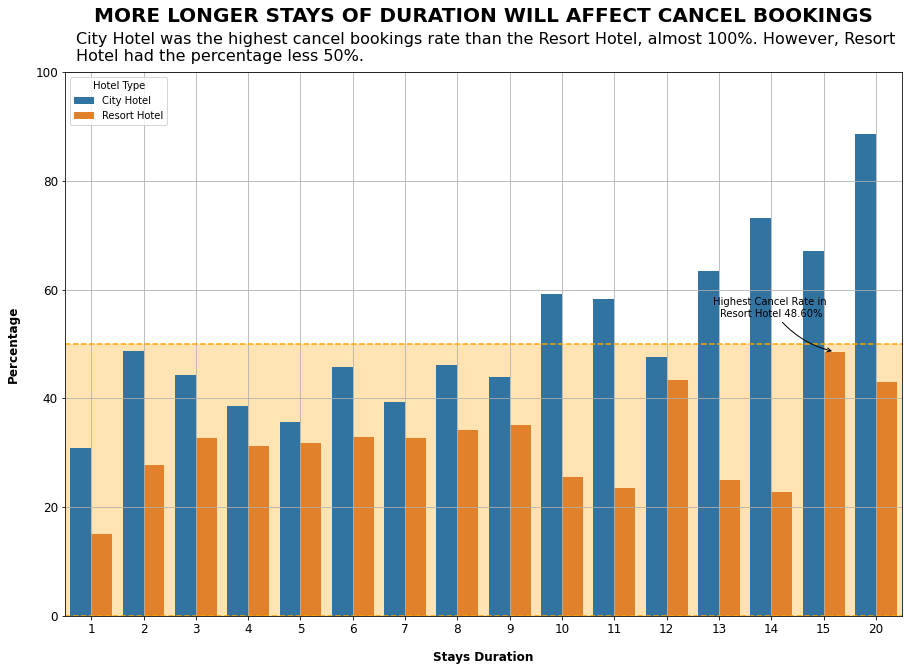

In [26]:
# make new variable
x = cancel_pivot['stays_duration_group']
y = cancel_pivot['percentage']
z = cancel_pivot['hotel']

# distribution using barplot
plt.figure(figsize=(15,10))
sns.barplot(x=x, y=y, hue=z, data=cancel_pivot)
plt.grid()

# set title, caption, legend
plt.title('MORE LONGER STAYS OF DURATION WILL AFFECT CANCEL BOOKINGS', fontsize=20, fontweight='bold', pad=50)
plt.text(x=0.7, y=102, s='City Hotel was the highest cancel bookings rate than the Resort Hotel, almost 100%. However, Resort \nHotel had the percentage less 50%.', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(title='Hotel Type', loc='upper left')

# set label and limitation
plt.xlabel('Stays Duration', fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Percentage', fontsize=12, fontweight='bold', labelpad=15)
plt.ylim(0,100)
plt.xlim(0.5,)

# annotate
plt.axhline(y=0, color='orange', ls='--')
plt.axhline(y=50, color='orange', ls='--')
plt.stackplot([0,20], 50, colors=('orange',), alpha=0.3)
plt.annotate('Highest Cancel Rate in \nResort Hotel 48.60%', xy = (15.2, 48.6), xytext = (14, 55), arrowprops = dict(facecolor = 'orange', arrowstyle = '->', connectionstyle = 'arc3, rad=.2'), ha = 'center')

# save file
plt.savefig('Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates Visualization.png')

# Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

In [ ]:
## Categories Lead Time

In [30]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0


In [ ]:
df